# Exercise 7. Outliers detection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# Load the dataset with population data of Galician counties 'concellos_con_poboacion.csv'
# Cargar el dataset con los datos de población de las comarcas gallegas 'concellos_con_poboacion.csv'

In [2]:
# We load a dataset with example data: length of rivers, in miles
# Cargamos un conjunto de datos con datos de ejemplo: longitud de los ríos, en millas
concello = pd.read_csv('../datasets/concellos_con_poboacion.csv',index_col=0)
concello

,CODIGOINE,poboacion
Concello,,
Sarreaus,32078,1114.0
Taboadela,32079,1452.0
"Bola, A",32014,1075.0
Maside,32045,2718.0
Trasmiras,32082,1261.0
...,...,...
Salvaterra de Miño,36050,10048.0
Sanxenxo,36051,17635.0
Silleda,36052,8845.0


In [4]:
concello.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313 entries, Sarreaus to Cerdedo-Cotobade
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CODIGOINE  313 non-null    int64  
 1   poboacion  312 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 15.4+ KB


In [2]:
# Shows the distribution of population data with a histogram
# Muestra la distribución de los datos de población con un histograma

/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


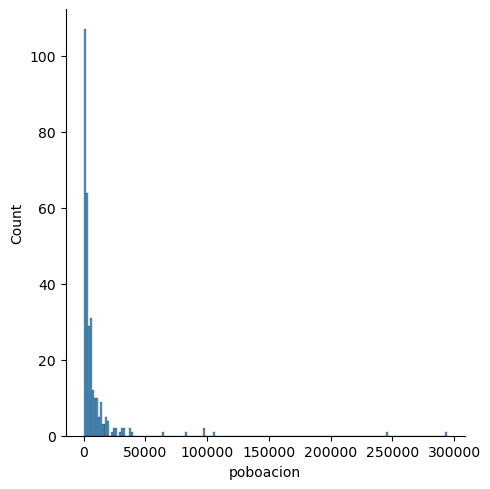

In [3]:
sns.displot(data=concello,x='poboacion')

In [3]:
# Shows the distribution of population data with a boxplot
# Muestra la distribución de los datos de población con un boxplot

/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='poboacion'>

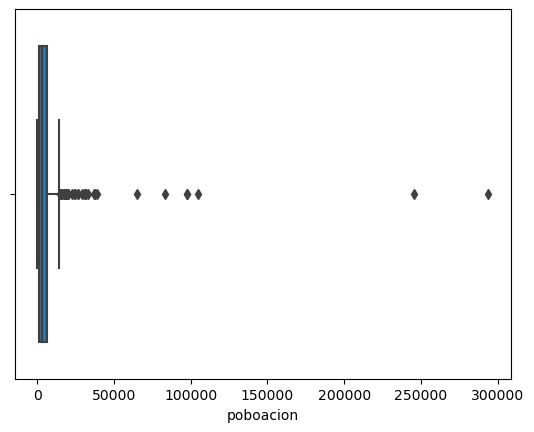

In [10]:
sns.boxplot(data=concello,x='poboacion')

In [4]:
# Show statistics with the function describe
# Mostrar estadísticas con la función describe

In [11]:
concello.describe()

,CODIGOINE,poboacion
count,313.000000,312.000000
mean,26712.846645,8621.557692
std,8117.474679,24631.368696
min,15001.000000,223.000000
25%,15081.000000,1405.500000
50%,27065.000000,2988.500000
75%,32075.000000,6785.500000
max,36901.000000,293837.000000


In [5]:
# Shows a list (dataframe) of the municipalities that could be considered outliers
# Muestra una lista (dataframe) de los municipios que podrían considerarse atípicos

In [5]:
Q1 = concello.poboacion.quantile(0.25)
Q3 = concello.poboacion.quantile(0.75)
IQR = Q3 - Q1
BI = (Q1 - 1.5 * IQR)
BS = (Q3 + 1.5 * IQR)
f'Whiskers: {BI}/{BS}'

'Whiskers: -6664.5/14855.5'

In [7]:
minimo = concello.poboacion.min()
maximo = concello.poboacion.max()
f'{minimo}/{maximo}'

'223.0/293837.0'

BI es inferior al mínimo, por lo que el bigote izquierdo será el mínimo

In [8]:
outliers = concello[(concello.poboacion < BI) | (concello.poboacion > BS)].sort_values('poboacion')
outliers

,CODIGOINE,poboacion
Concello,,
Gondomar,36021,14920.0
Mos,36033,15190.0
Viveiro,27066,15312.0
Sada,15075,16382.0
Poio,36041,17230.0
Tui,36055,17398.0
Sanxenxo,36051,17635.0
Nigrán,36035,18005.0
Monforte de Lemos,27031,18242.0


In [6]:
# Create a new dataframe eliminating the outliers
# Crear un nuevo dataframe eliminando los valores atípicos

In [11]:
concello_nooutliers = concello[(concello.poboacion >= BI) & (concello.poboacion <= BS)].sort_values('poboacion')
concello_nooutliers

,CODIGOINE,poboacion
Concello,,
Negueira de Muñiz,27035,223.0
"Teixeira, A",32080,336.0
Beade,32010,379.0
Larouco,32038,427.0
Chandrexa de Queixa,32029,482.0
...,...,...
Cambados,36006,13673.0
Tomiño,36054,13730.0
"Carballiño, O",32019,13911.0


In [7]:
# Draw a new boxplot on the new dataframe
# Dibuja un nuevo boxplot en el nuevo marco de datos

<Axes: xlabel='poboacion'>

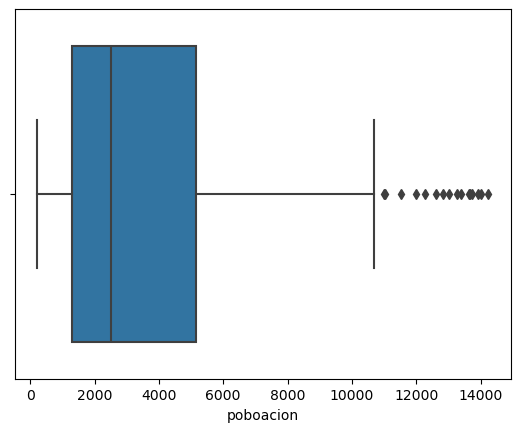

In [12]:
sns.boxplot(data=concello_nooutliers,x='poboacion')

In [9]:
# Are there more outliers? What are they?
# ¿Hay más valores atípicos? ¿Cuáles son?

In [13]:
Q1 = concello_nooutliers.poboacion.quantile(0.25)
Q3 = concello_nooutliers.poboacion.quantile(0.75)
IQR = Q3 - Q1
BI = (Q1 - 1.5 * IQR)
BS = (Q3 + 1.5 * IQR)
f'Whiskers: {BI}/{BS}'

'Whiskers: -4463.0/10929.0'

In [14]:
outliers = concello_nooutliers[(concello_nooutliers.poboacion < BI) | (concello_nooutliers.poboacion > BS)].sort_values('poboacion')
outliers

,CODIGOINE,poboacion
Concello,,
Rianxo,15072,11004.0
Barbadás,32008,11022.0
"Laracha, A",15041,11521.0
Bueu,36004,11987.0
Baiona,36003,12286.0
Ordes,15059,12605.0
Fene,15035,12832.0
Betanzos,15009,13030.0
Sarria,27057,13257.0


In [10]:
# Eliminate new outliers
# Eliminar nuevos valores atípicos

In [15]:
concello_nooutliers2 = concello_nooutliers[(concello_nooutliers.poboacion >= BI) & (concello_nooutliers.poboacion <= BS)].sort_values('poboacion')
concello_nooutliers2

,CODIGOINE,poboacion
Concello,,
Negueira de Muñiz,27035,223.0
"Teixeira, A",32080,336.0
Beade,32010,379.0
Larouco,32038,427.0
Chandrexa de Queixa,32029,482.0
...,...,...
"Pontes de García Rodríguez, As",15070,10032.0
Salvaterra de Miño,36050,10048.0
Foz,27019,10078.0


In [11]:
# There are still outliers? .... (let it go! ;-))
# ¿Todavía hay valores atípicos? .... (¡déjalo! ;-))

<Axes: xlabel='poboacion'>

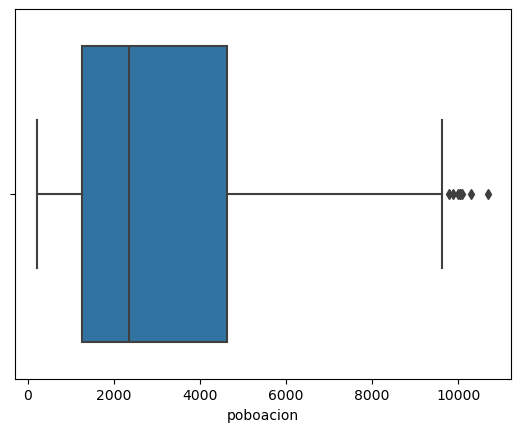

In [16]:
sns.boxplot(data=concello_nooutliers2,x='poboacion')

In [ ]:
# We could repeat the process until the outliers disappear completely
# Podríamos repetir el proceso hasta que los valores atípicos desaparezcan por completo